# ELE510 Image Processing with robot vision: LAB, Exercise  4, Spatial-domain filtering

**Purpose:** *To learn about Linear Filters and Local Image Features and its use in computer vision (image processing). Some basic experiments will be implemented using Pyhon, OpenCV and other packages.*

The theory for this exercise can be found in chapter 5 of the text book [1]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)
- [scipy](https://docs.scipy.org/doc/)


**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
first. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

In this problem we want to get a better understanding of linear filtering using convolution. 

**The computations should be done first by hand on paper (attached a picture for your solution)**. Thereafter, check the results on the notebook with the pre-built functions.

**Sobel** and **Prewitt** masks are used to compute the two components of the gradient. 
They perform differentiation over a 3 pixel region in the horizontal (x) and vertical (y) direction respectively and smooth by a 3 pixel smoothing filter in the other direction. 
The masks represent separable 2D filters and can thereby be separated in a differentiation filter and a smoothing filter.

The **Sobel masks**:
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1 & 0 & -1\\ 2 & 0 & -2 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}.
\end{equation}

The **Prewitt masks**:
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1 & 0 & -1\\ 1 & 0 & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}


In [1]:
import numpy as np
import cv2

sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

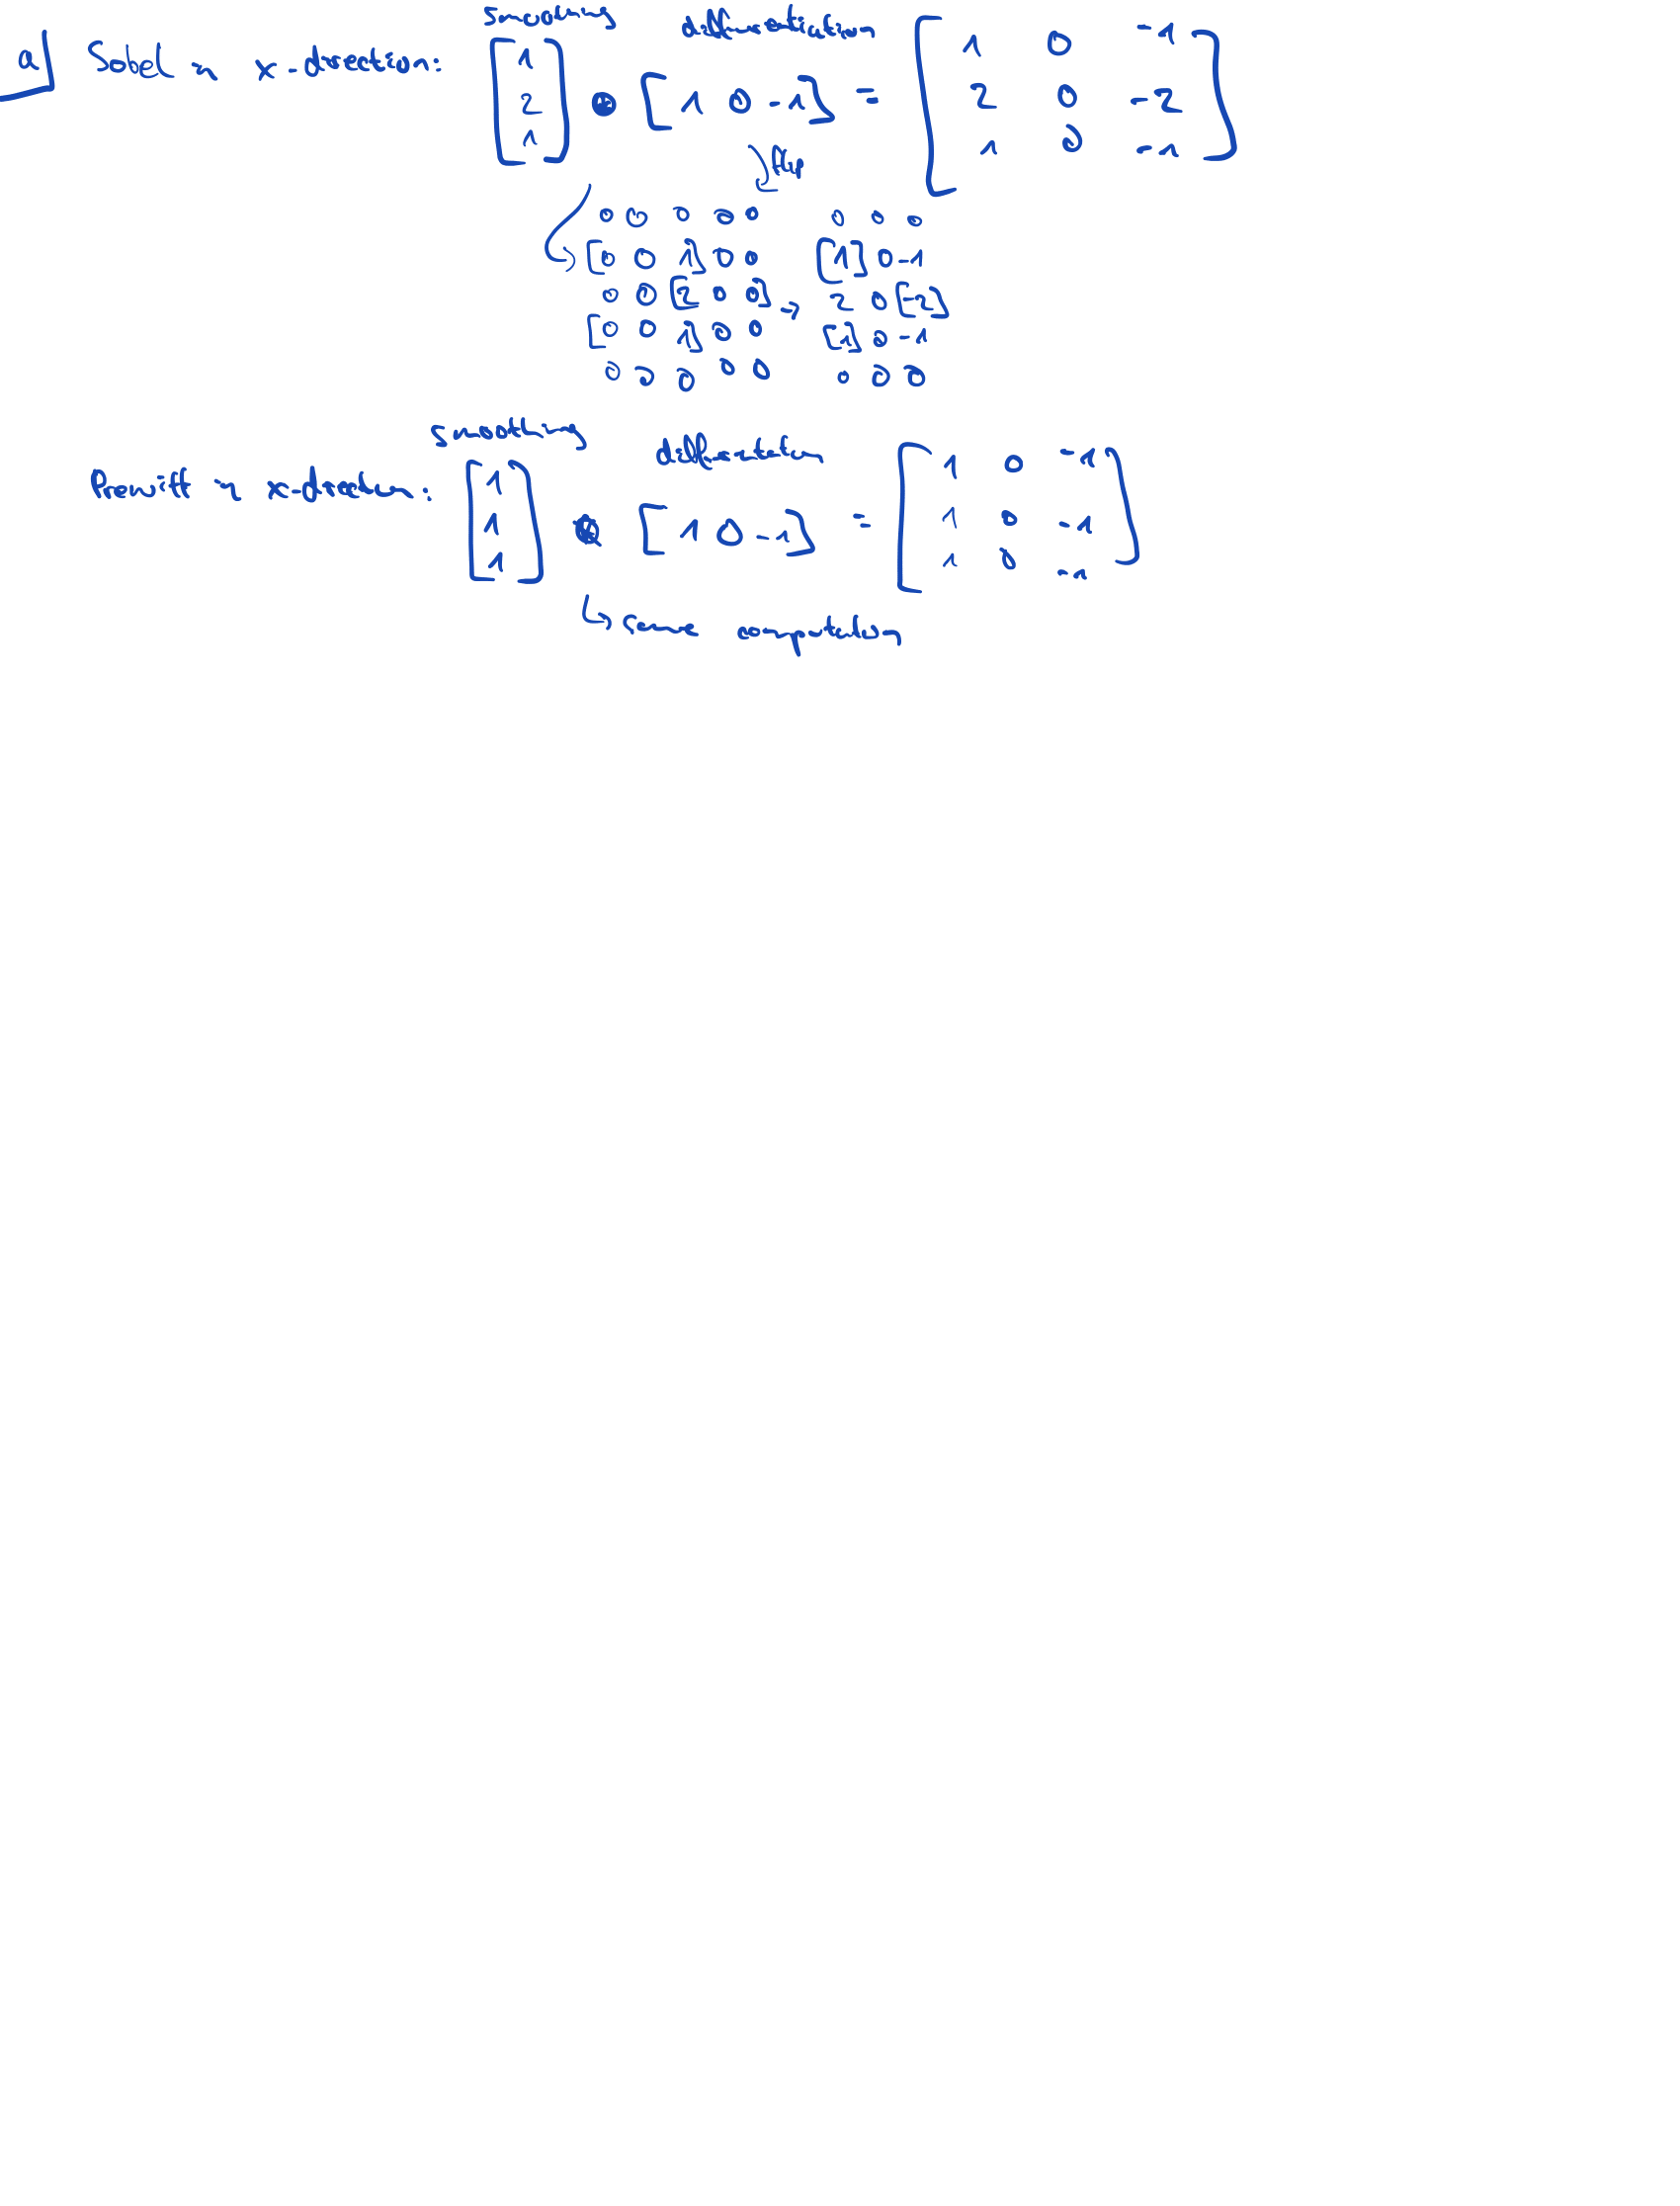

In [2]:
from IPython.display import Image
Image(filename='handwritten-1.png')

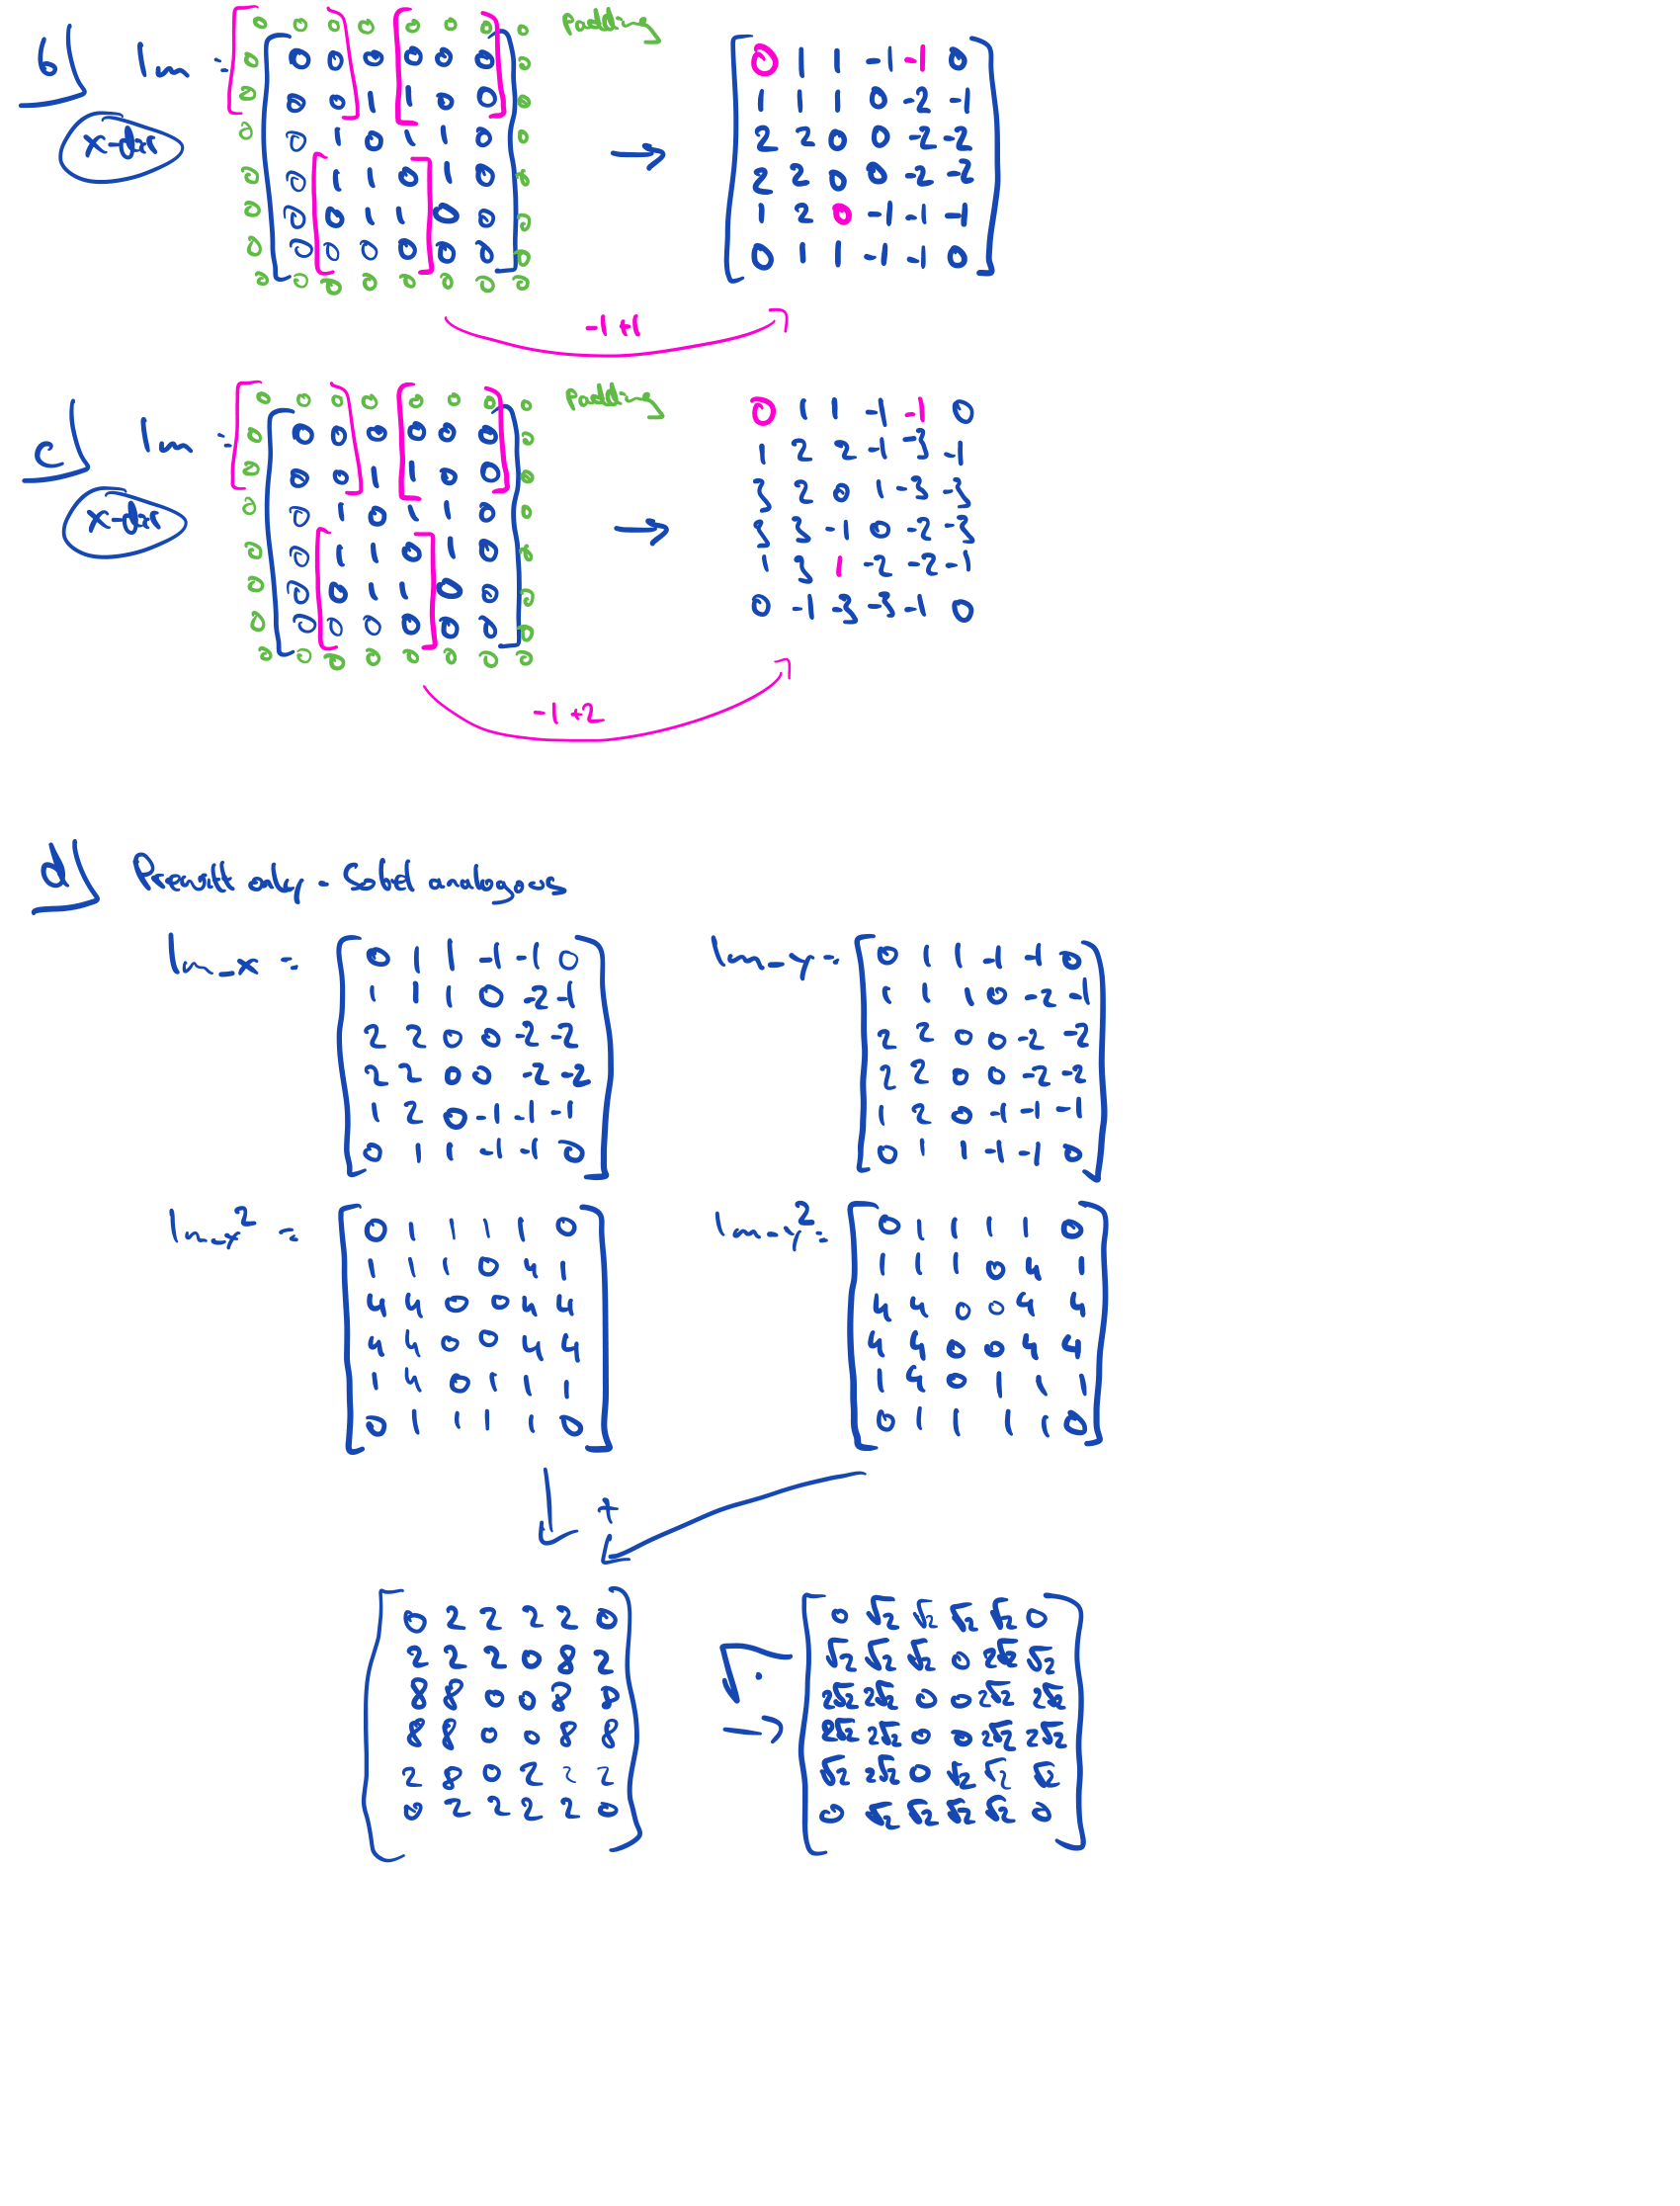

In [3]:
from IPython.display import Image
Image(filename='handwritten-2.png')


**a)** Find the 1D **differentiation filter** and the 1D **smoothing filter** for the Sobel and Prewitt masks. The result will be similar for the x- and y-direction. It is therefore sufficient to find the result for one of the directions, e.g. the x-direction.

Consider the following image:

\begin{equation}
    {\mathbf Im} = \begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 1 & 0 & 1 & 1 & 0\\
    0 & 1 & 1 & 0 & 1 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}.
\end{equation}





In [4]:
Im = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0]
])
Im = Im.astype(np.float64)

**b)** Filter this image using the **Prewitt** masks. Find the two output images, representing the differential along the horizontal and vertical directions.


In [5]:
# flip the kernel
kernel_x = np.flipud(np.fliplr(prewitt_x))
kernel_y = np.flipud(np.fliplr(prewitt_x))

Im_prewitt_x = cv2.filter2D(Im, -1, kernel_x, borderType=cv2.BORDER_CONSTANT)
Im_prewitt_y = cv2.filter2D(Im, -1, kernel_y, borderType=cv2.BORDER_CONSTANT)

print("Im_x: \n", Im_prewitt_x)
print("Im_y: \n", Im_prewitt_y)

Im_x: 
 [[ 0.  1.  1. -1. -1.  0.]
 [ 1.  1.  1.  0. -2. -1.]
 [ 2.  2.  0.  0. -2. -2.]
 [ 2.  2.  0.  0. -2. -2.]
 [ 1.  2.  0. -1. -1. -1.]
 [ 0.  1.  1. -1. -1.  0.]]
Im_y: 
 [[ 0.  1.  1. -1. -1.  0.]
 [ 1.  1.  1.  0. -2. -1.]
 [ 2.  2.  0.  0. -2. -2.]
 [ 2.  2.  0.  0. -2. -2.]
 [ 1.  2.  0. -1. -1. -1.]
 [ 0.  1.  1. -1. -1.  0.]]


**c)** Filter this image using the **Sobel** masks. Find the two output images, representing the differential along the horizontal and vertical directions.


In [6]:
# flip the kernel
kernel_x = np.flipud(np.fliplr(sobel_x))
kernel_y = np.flipud(np.fliplr(sobel_y))

Im_sobel_x = cv2.filter2D(Im, -1, kernel_x, borderType=cv2.BORDER_CONSTANT)
Im_sobel_y = cv2.filter2D(Im, -1, kernel_y, borderType=cv2.BORDER_CONSTANT)

print("Im_x: \n", Im_sobel_x)
print("Im_y: \n", Im_sobel_y)

Im_x: 
 [[ 0.  1.  1. -1. -1.  0.]
 [ 1.  2.  2. -1. -3. -1.]
 [ 3.  2.  0.  1. -3. -3.]
 [ 3.  3. -1.  0. -2. -3.]
 [ 1.  3.  1. -2. -2. -1.]
 [ 0.  1.  1. -1. -1.  0.]]
Im_y: 
 [[ 0.  1.  3.  3.  1.  0.]
 [ 1.  2.  2.  3.  3.  1.]
 [ 1.  2.  0. -1.  1.  1.]
 [-1. -1.  1.  0. -2. -1.]
 [-1. -3. -3. -2. -2. -1.]
 [ 0. -1. -3. -3. -1.  0.]]



**d)** Compute the gradient, $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$, images based on the **Prewitt** and **Sobel** masks.


In [7]:
Im_prewitt_gradient = np.sqrt(Im_prewitt_x**2 + Im_prewitt_y**2)
Im_sobel_gradient = np.sqrt(Im_sobel_x**2 + Im_sobel_y**2)

print("Im_prewitt_gradient: \n", Im_prewitt_gradient)
print("Im_sobel_gradient: \n", Im_sobel_gradient)

Im_prewitt_gradient: 
 [[0.         1.41421356 1.41421356 1.41421356 1.41421356 0.        ]
 [1.41421356 1.41421356 1.41421356 0.         2.82842712 1.41421356]
 [2.82842712 2.82842712 0.         0.         2.82842712 2.82842712]
 [2.82842712 2.82842712 0.         0.         2.82842712 2.82842712]
 [1.41421356 2.82842712 0.         1.41421356 1.41421356 1.41421356]
 [0.         1.41421356 1.41421356 1.41421356 1.41421356 0.        ]]
Im_sobel_gradient: 
 [[0.         1.41421356 3.16227766 3.16227766 1.41421356 0.        ]
 [1.41421356 2.82842712 2.82842712 3.16227766 4.24264069 1.41421356]
 [3.16227766 2.82842712 0.         1.41421356 3.16227766 3.16227766]
 [3.16227766 3.16227766 1.41421356 0.         2.82842712 3.16227766]
 [1.41421356 4.24264069 3.16227766 2.82842712 2.82842712 1.41421356]
 [0.         1.41421356 3.16227766 3.16227766 1.41421356 0.        ]]



**e)** How will you interpret the results with respect to edges in the test image?

The kernels in x direction detect edges along x directions, while the kernels in y direction edges along y directions. The sobel filter produces more drastic gradients (higher values), so the edges could be detected more easily using sobel filter instead of prewitt filter.


## Problem 2

Given a test image with black background (gray level 0), and a white rectangle (gray level value 1), of size $8 \times 8$ pixels in the center. 
Use the notebook to create a matrix representing this image. 

Let the test image be of size $12 \times 14$. 

<details>
<summary>
    <font size="3" color="green">
        <b>Click here for a small hint </b>
    </font>
</summary>
<div class="alert alert-block alert-info">
The test image can be created by the following numpy commands: 
    
```python
R = np.ones(shape=(8,8))
I = np.zeros(shape=(12,14))
I[2:10,3:11] = R
```
</div>
</details>

Use the notebook to do the necessary computations in the following questions.

Use the Prewitt masks:
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

for the computation of the differentials, $\frac{\partial I}{\partial x} = I_{x}$ and $\frac{\partial I}{\partial y} = I_{y}$ respectively.


**a)** Compute and sketch the gradient of the test image using the 2-norm for the magnitude. Use $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$. Show all relevant pixel values in the magnitude gradient image. 


**Hint:** use `cv2.filter2D` function ([Documentation](https://www.docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)) to perform a convolutional operation on an image using a specific mask.

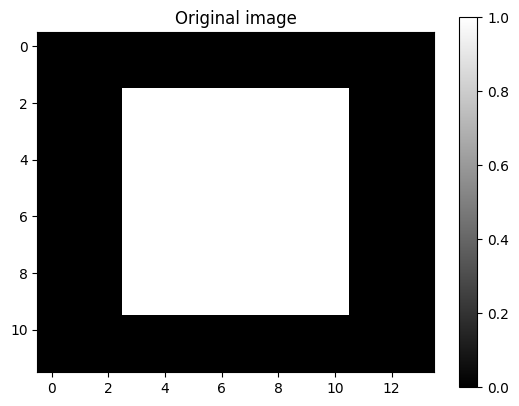

Kernel x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


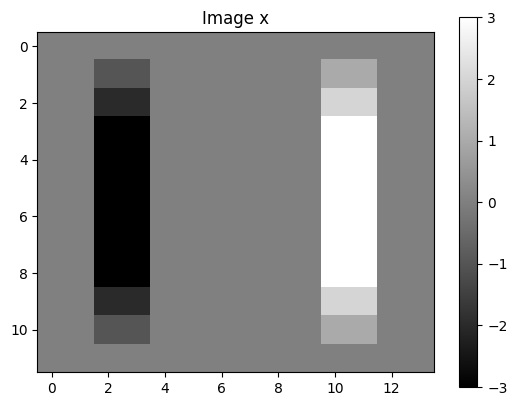

Kernel y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


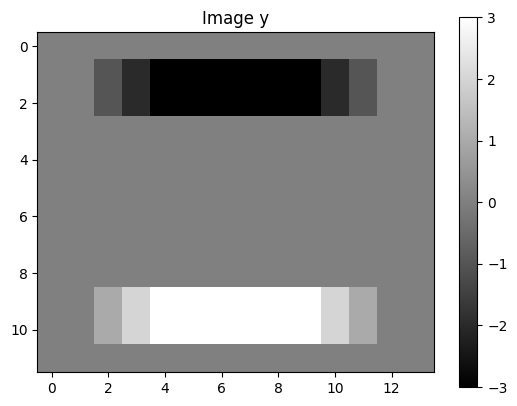

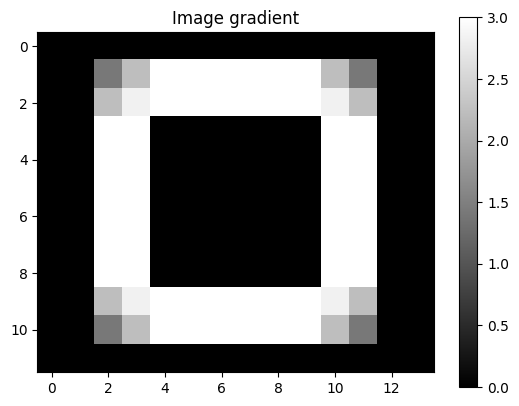

Pixel values of the gradient image:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 2.23606798 3.         3.
  3.         3.         3.         3.         2.23606798 1.41421356
  0.         0.        ]
 [0.         0.         2.23606798 2.82842712 3.         3.
  3.         3.         3.         3.         2.82842712 2.23606798
  0.         0.        ]
 [0.         0.         3.         3.         0.         0.
  0.         0.         0.         0.         3.         3.
  0.         0.        ]
 [0.         0.         3.         3.         0.         0.
  0.         0.         0.         0.         3.         3.
  0.         0.        ]
 [0.         0.         3.         3.         0.         0.
  0.         0.         0.         0.         3.         3.
  0.         0.        ]
 [0.         0.         3.         3.         0.         0.
  0.         0.   

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

R = np.ones(shape=(8,8))
I = np.zeros(shape=(12,14))
I[2:10,3:11] = R

def draw_image(I, title):
    """Draw numpy array as image"""
    plt.imshow(I, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

draw_image(I, "Original image")

kernel_x = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

print("Kernel x:")
print(kernel_x)

I_x = cv2.filter2D(src=I, kernel=kernel_x, ddepth=-1)

draw_image(I_x, "Image x")

kernel_y = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])

print("Kernel y:")
print(kernel_y)

I_y = cv2.filter2D(src=I, kernel=kernel_y, ddepth=-1)

draw_image(I_y, "Image y")

I_grad = np.sqrt(I_x**2 + I_y**2)

draw_image(I_grad, "Image gradient")

print("Pixel values of the gradient image:")
print(I_grad)


**b)** Sketch the histogram of gradient directions. Be precise in labeling the height of each bar in the histogram.


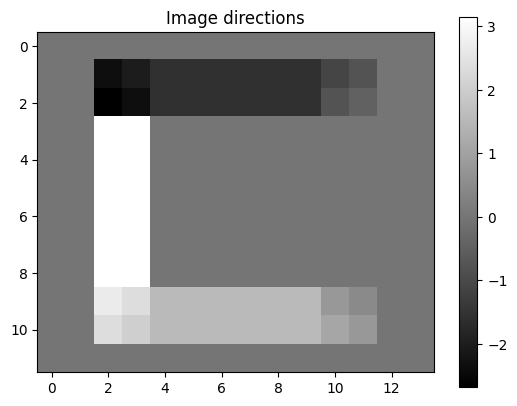

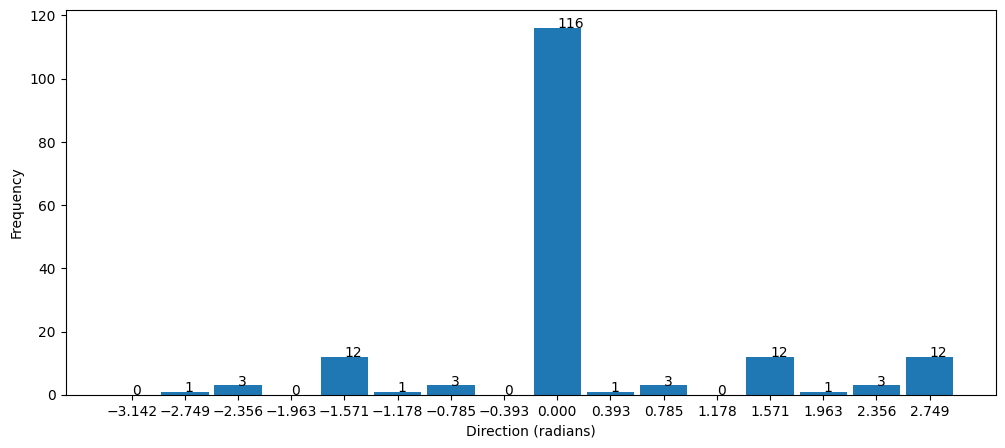

In [9]:
import matplotlib.pyplot as plt

# directions
I_dir = np.arctan2(I_y, I_x)

draw_image(I_dir, "Image directions")

hist, bins = np.histogram(I_dir, bins=16, range=(-np.pi, np.pi))

plt.figure(figsize=(12, 5))
plt.bar(bins[:-1], hist, width=0.35)
plt.xticks(bins[:-1])
plt.xlabel("Direction (radians)")
plt.ylabel("Frequency")
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(hist[i]))
plt.show()



**c)** Sketch the Laplacian of the test image using the mask in previous equation. Show all relevant pixel values in the Laplacian image.

The Laplacian can be computed using the following mask:
\begin{equation}
    {\mathbf h}_{L}=
    \begin{bmatrix} 0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix},
\end{equation}


Laplacian mask:
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


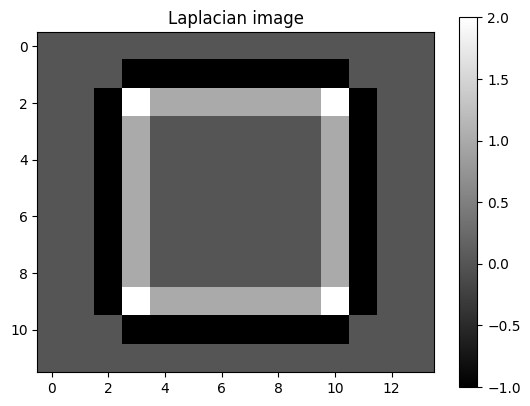

Pixel values of the Laplacian image:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  0. -1.  2.  1.  1.  1.  1.  1.  1.  2. -1.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0. -1.  2.  1.  1.  1.  1.  1.  1.  2. -1.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [10]:
laplacian_mask = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])

print("Laplacian mask:")
print(laplacian_mask)

I_lap = cv2.filter2D(src=I, kernel=laplacian_mask, ddepth=-1)

draw_image(I_lap, "Laplacian image")

print("Pixel values of the Laplacian image:")
print(I_lap)

**d)** What is the resulting mask for computation of the Laplacian if the Prewitt masks are used for computation of the differentials? 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    </font>
</summary>

- Import the <code>scipy</code>  package and use the <code>convolve2d</code> function (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html">Documentation</a>) for this task.

- If you want to check if the resulting mask is correct, use the built-in cv2 <code>cv2.Laplacian(I, -1, ksize=5)</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6">Documentation</a>) where <code>I</code> is the test image and <code>ksize</code> is the aperture size used to compute the second-derivative filters.
</details>

Laplacian mask:
[[  2   2   1   2   2]
 [  2   0  -4   0   2]
 [  1  -4 -12  -4   1]
 [  2   0  -4   0   2]
 [  2   2   1   2   2]]


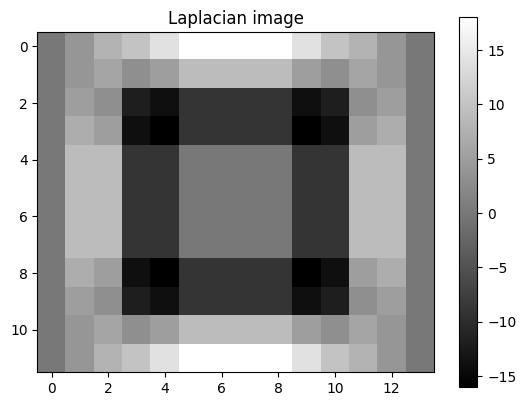

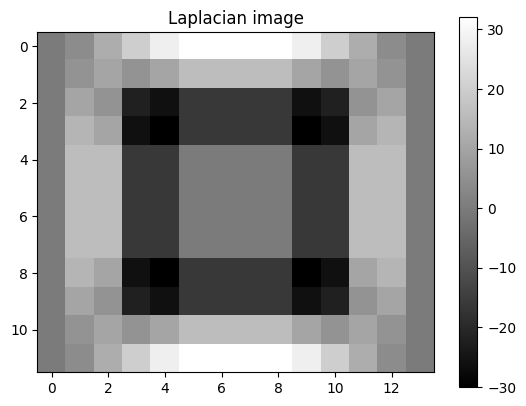

In [11]:
from scipy.signal import convolve2d

laplacian_mask = convolve2d(kernel_x, kernel_x) + convolve2d(kernel_y, kernel_y)

print("Laplacian mask:")
print(laplacian_mask)

I_lap = cv2.filter2D(src=I, kernel=laplacian_mask, ddepth=-1)

draw_image(I_lap, "Laplacian image")

I_lap = cv2.Laplacian(I, -1, ksize=5)

draw_image(I_lap, "Laplacian image")


## Problem 3

One of the most common linear filters in computer vision applications is the Gaussian smoothing filter. 

In this problem we want to study the use of Gaussian filters with different standard deviations, $\sigma$, and different sizes, $K \times K$, where $K$ is odd ($K = 2k+1$, $k$ is integer). 
The filter kernel (mask) is found by using the OpenCV function `cv2.getGaussianKernel()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))). 
Start by finding filter masks as follows

**a)** **h05**: $\sigma = 0.5$, $K = 7$

**b)** **h1**: $\sigma = 1$, $K = 11$

**c)** **h15**: $\sigma = 1.5$, $K = 15$

Use the `plt.stem` function from Matplotlib and display each filter (sampled 1D Gaussian function). 

If the size $K$ is too small we will get a truncated Gaussian with a step at the tails. 

**d)** Show the result for c) above when $K = 7$.

a)
Gaussian filter mask:
[[1.43507365e-16 3.16096006e-12 1.27522230e-09 9.42268913e-09
  1.27522230e-09 3.16096006e-12 1.43507365e-16]
 [3.16096006e-12 6.96247786e-08 2.80886404e-05 2.07548540e-04
  2.80886404e-05 6.96247786e-08 3.16096006e-12]
 [1.27522230e-09 2.80886404e-05 1.13317663e-02 8.37310570e-02
  1.13317663e-02 2.80886404e-05 1.27522230e-09]
 [9.42268913e-09 2.07548540e-04 8.37310570e-02 6.18693477e-01
  8.37310570e-02 2.07548540e-04 9.42268913e-09]
 [1.27522230e-09 2.80886404e-05 1.13317663e-02 8.37310570e-02
  1.13317663e-02 2.80886404e-05 1.27522230e-09]
 [3.16096006e-12 6.96247786e-08 2.80886404e-05 2.07548540e-04
  2.80886404e-05 6.96247786e-08 3.16096006e-12]
 [1.43507365e-16 3.16096006e-12 1.27522230e-09 9.42268913e-09
  1.27522230e-09 3.16096006e-12 1.43507365e-16]]
Sampled 1D Gaussian function:


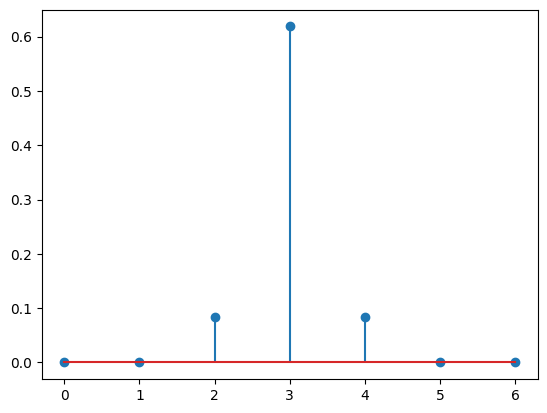


b)
Gaussian filter mask:
[[2.21033495e-12 1.98968011e-10 6.58891561e-09 8.02694246e-08
  3.59742603e-07 5.93115282e-07 3.59742603e-07 8.02694246e-08
  6.58891561e-09 1.98968011e-10 2.21033495e-12]
 [1.98968011e-10 1.79105296e-08 5.93115282e-07 7.22562334e-06
  3.23829971e-05 5.33905362e-05 3.23829971e-05 7.22562334e-06
  5.93115282e-07 1.79105296e-08 1.98968011e-10]
 [6.58891561e-09 5.93115282e-07 1.96412806e-05 2.39279782e-04
  1.07237759e-03 1.76805174e-03 1.07237759e-03 2.39279782e-04
  1.96412806e-05 5.93115282e-07 6.58891561e-09]
 [8.02694246e-08 7.22562334e-06 2.39279782e-04 2.91502450e-03
  1.30642335e-02 2.15392796e-02 1.30642335e-02 2.91502450e-03
  2.39279782e-04 7.22562334e-06 8.02694246e-08]
 [3.59742603e-07 3.23829971e-05 1.07237759e-03 1.30642335e-02
  5.85498323e-02 9.65323539e-02 5.85498323e-02 1.30642335e-02
  1.07237759e-03 3.23829971e-05 3.59742603e-07]
 [5.93115282e-07 5.33905362e-05 1.76805174e-03 2.15392796e-02
  9.65323539e-02 1.59154945e-01 9.65323539e-02 2.153

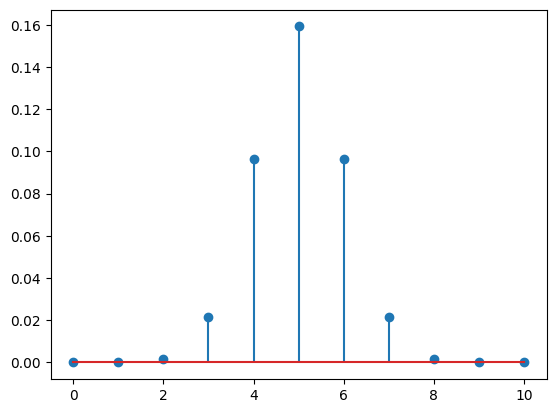


c)
Gaussian filter mask:
[[2.46416175e-11 4.42891877e-10 5.10395043e-09 3.77133761e-08
  1.78675335e-07 5.42767744e-07 1.05716721e-06 1.32024208e-06
  1.05716721e-06 5.42767744e-07 1.78675335e-07 3.77133761e-08
  5.10395043e-09 4.42891877e-10 2.46416175e-11]
 [4.42891877e-10 7.96024103e-09 9.17349759e-08 6.77834883e-07
  3.21139043e-06 9.75534277e-06 1.90008132e-05 2.37291441e-05
  1.90008132e-05 9.75534277e-06 3.21139043e-06 6.77834883e-07
  9.17349759e-08 7.96024103e-09 4.42891877e-10]
 [5.10395043e-09 9.17349759e-08 1.05716721e-06 7.81146783e-06
  3.70085307e-05 1.12421990e-04 2.18968136e-04 2.73458109e-04
  2.18968136e-04 1.12421990e-04 3.70085307e-05 7.81146783e-06
  1.05716721e-06 9.17349759e-08 5.10395043e-09]
 [3.77133761e-08 6.77834883e-07 7.81146783e-06 5.77193740e-05
  2.73458109e-04 8.30692388e-04 1.61796784e-03 2.02059731e-03
  1.61796784e-03 8.30692388e-04 2.73458109e-04 5.77193740e-05
  7.81146783e-06 6.77834883e-07 3.77133761e-08]
 [1.78675335e-07 3.21139043e-06 3.7008

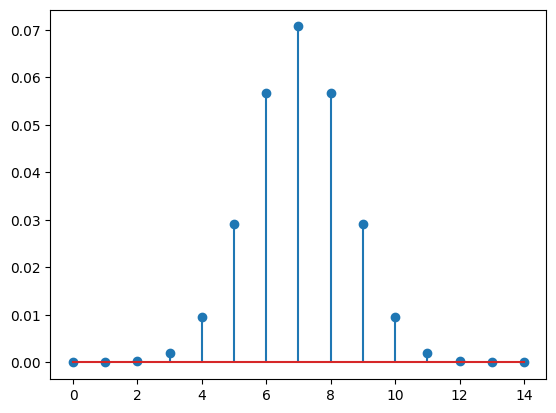


d)
Gaussian filter mask:
[[0.00134197 0.00407653 0.00794    0.00991586 0.00794    0.00407653
  0.00134197]
 [0.00407653 0.01238341 0.02411958 0.03012171 0.02411958 0.01238341
  0.00407653]
 [0.00794    0.02411958 0.04697853 0.05866909 0.04697853 0.02411958
  0.00794   ]
 [0.00991586 0.03012171 0.05866909 0.07326883 0.05866909 0.03012171
  0.00991586]
 [0.00794    0.02411958 0.04697853 0.05866909 0.04697853 0.02411958
  0.00794   ]
 [0.00407653 0.01238341 0.02411958 0.03012171 0.02411958 0.01238341
  0.00407653]
 [0.00134197 0.00407653 0.00794    0.00991586 0.00794    0.00407653
  0.00134197]]
Sampled 1D Gaussian function:


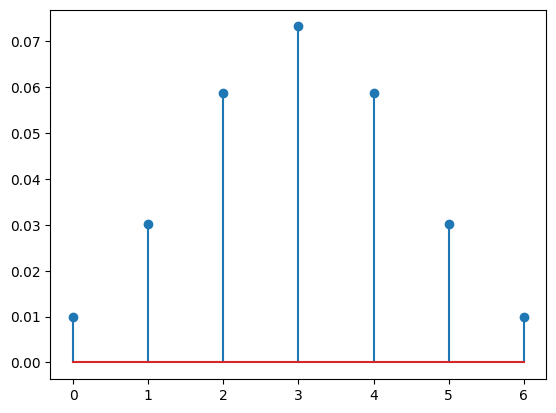

In [12]:
print("a)")
filter_mask_a = cv2.getGaussianKernel(ksize=7, sigma=0.5)
filter_mask_a = convolve2d(filter_mask_a, filter_mask_a.T, mode='full')
print("Gaussian filter mask:")
print(filter_mask_a)
print("Sampled 1D Gaussian function:")
plt.stem(filter_mask_a[7//2,:])
plt.show()

print("")
print("b)")
filter_mask_b = cv2.getGaussianKernel(ksize=11, sigma=1)
filter_mask_b = convolve2d(filter_mask_b, filter_mask_b.T, mode='full')
print("Gaussian filter mask:")
print(filter_mask_b)
print("Sampled 1D Gaussian function:")
plt.stem(filter_mask_b[11//2,:])
plt.show()

print("")
print("c)")
filter_mask_c = cv2.getGaussianKernel(ksize=15, sigma=1.5)
filter_mask_c = convolve2d(filter_mask_c, filter_mask_c.T, mode='full')
print("Gaussian filter mask:")
print(filter_mask_c)
print("Sampled 1D Gaussian function:")
plt.stem(filter_mask_c[15//2,:])
plt.show()

print("")
print("d)")
filter_mask_d = cv2.getGaussianKernel(ksize=7, sigma=1.5)
filter_mask_d = convolve2d(filter_mask_d, filter_mask_d.T, mode='full')
print("Gaussian filter mask:")
print(filter_mask_d)
print("Sampled 1D Gaussian function:")
plt.stem(filter_mask_d[7//2,:])
plt.show()


## Problem 4

In this exercise we want to study how two well-known filters perform on noise removal, namely the Gaussian and the median filter. 
```python
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels
```

**a)** Apply Gaussian smoothing to the original image, `Im`,  using the defined filter kernels from problems 3a, 3b, and 3c. Explain the results.


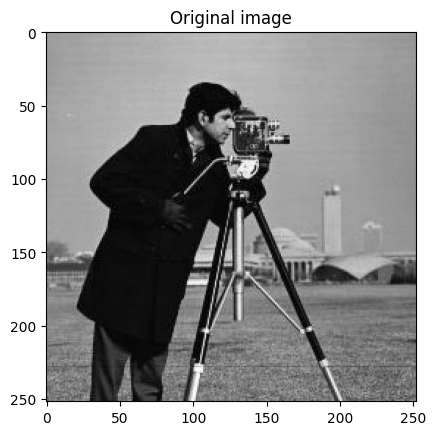

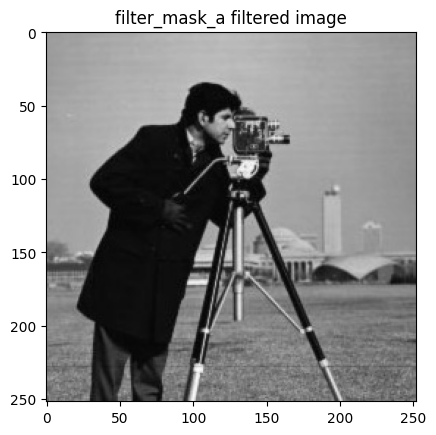

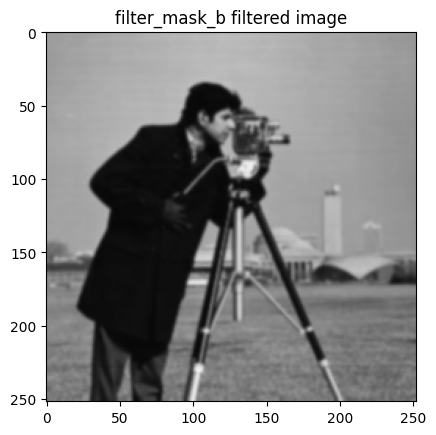

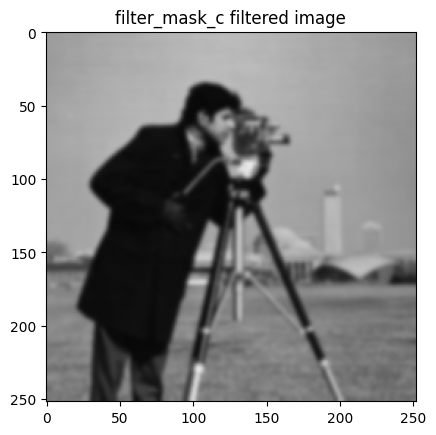

In [13]:
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels

filters = {
    "filter_mask_a": filter_mask_a,
    "filter_mask_b": filter_mask_b,
    "filter_mask_c": filter_mask_c,
}


def draw_image(img, title):
    """Draw numpy array as image"""
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

draw_image(Im, "Original image")

for name, filter_mask in filters.items():
    Im_filtered = cv2.filter2D(src=Im, kernel=filter_mask, ddepth=-1)
    draw_image(Im_filtered, f"{name} filtered image")

We can observe that a larger gaussian filter (with larger $K$) will result in a more blurred image.

Gaussian noise:

**b)** Apply the three Gaussian filters, described in problems 3a, 3b, and 3c, to the image `Im_gauss`. Explain the results.


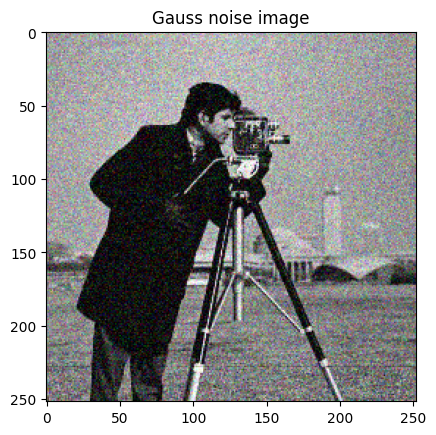

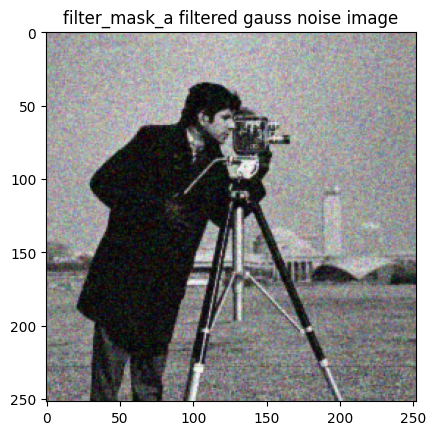

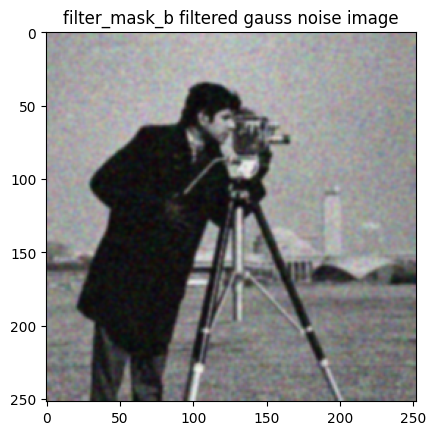

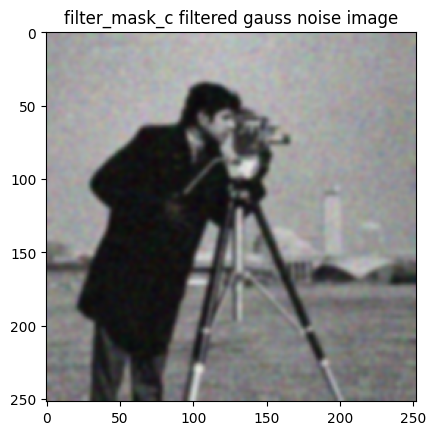

In [14]:
draw_image(Im_gauss, "Gauss noise image")

for name, filter_mask in filters.items():
    Im_filtered = cv2.filter2D(src=Im_gauss, kernel=filter_mask, ddepth=-1)
    draw_image(Im_filtered, f"{name} filtered gauss noise image")

We see that the gaussian noise is still observable in all blurred images, also becoming more blurred.


**c)** Apply a median filter on the image `Im_gauss` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?


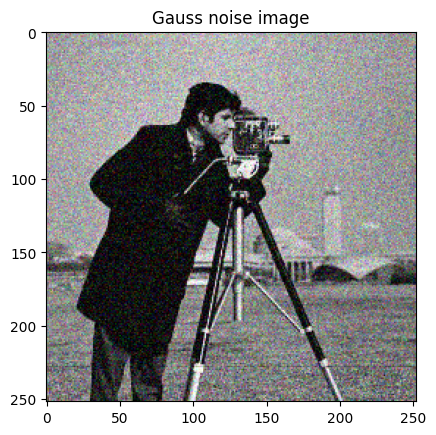

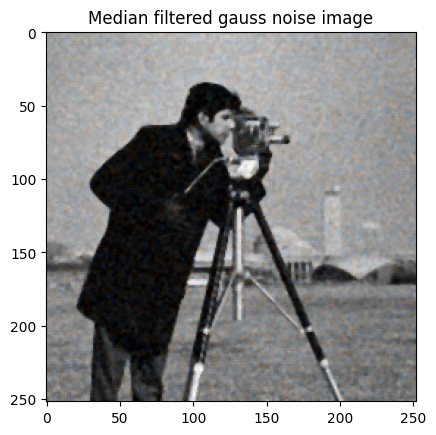

In [15]:
from scipy.ndimage import median_filter

draw_image(Im_gauss, "Gauss noise image")

median_filtered = median_filter(Im_gauss, size=3)
draw_image(median_filtered, "Median filtered gauss noise image")

Compared to the gauss filter, the median filter is better at removing the gaussian noise: If one would want to remove the gaussian noise using gaussian filters to the level of the median filter, the image would be a lot more blurred. So, the median filter is more efficient at removing the gaussian noise (retains sharp edges better).


Salt & pepper noise:

**d)** Apply the three Gaussian filters, described in problems 3a, 3b, and 3c, to the image `Im_SP`. Explain the results.


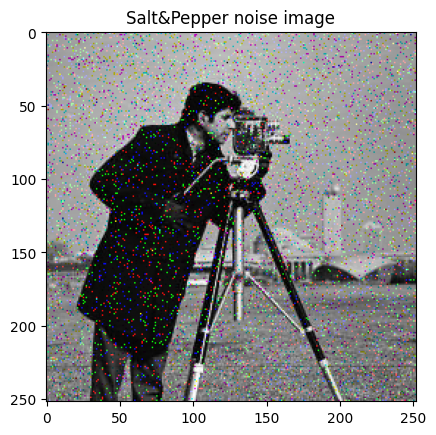

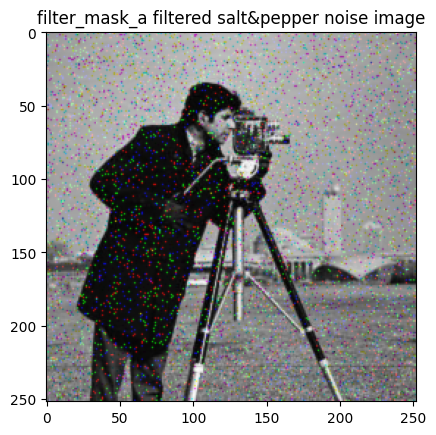

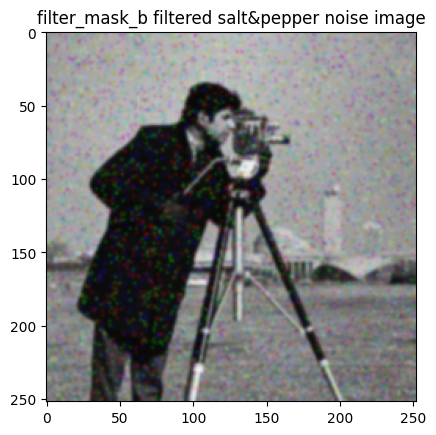

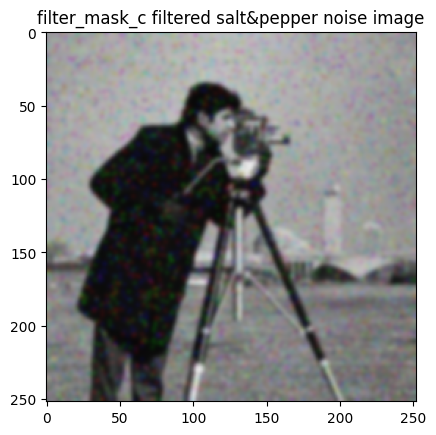

In [16]:
draw_image(Im_SP, "Salt&Pepper noise image")

for name, filter_mask in filters.items():
    Im_filtered = cv2.filter2D(src=Im_SP, kernel=filter_mask, ddepth=-1)
    draw_image(Im_filtered, f"{name} filtered salt&pepper noise image")

Similar to the gaussian noise, after applying the gaussian filters to the image with salt & pepper noise, the noise is still observable in all blurred images, also becoming more blurred.


**e)** Apply a median filter on the image `Im_SP` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

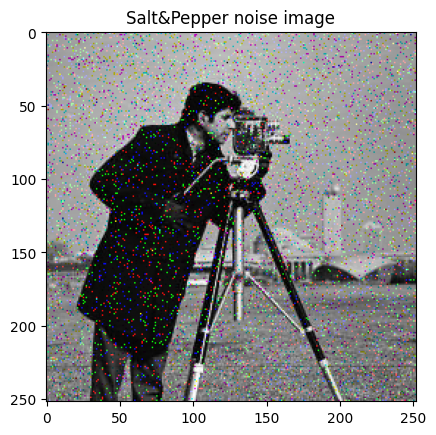

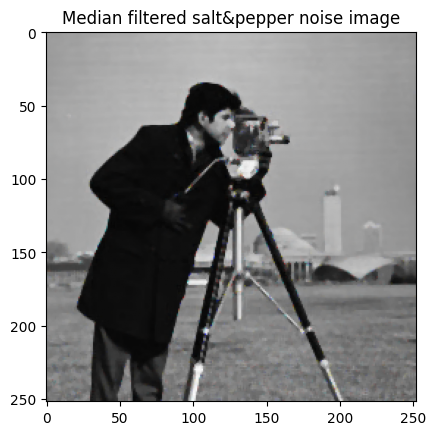

In [17]:
from scipy.ndimage import median_filter

draw_image(Im_SP, "Salt&Pepper noise image")

median_filtered = median_filter(Im_SP, size=3)
draw_image(median_filtered, "Median filtered salt&pepper noise image")

The median filter performs wonders! It has removed all noise in the image, while retaining the sharp edges and the overall image quality. The gaussian filters, compared to the median filter, are useless against salt & pepper noise.



### Delivery (dead line) on CANVAS: 29.09.2023 at 23.59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
